In [1]:
%pylab inline
import px4tools
import pandas

Populating the interactive namespace from numpy and matplotlib


In [6]:
def alan_plot(data):
    data.index = pandas.TimedeltaIndex(data.index, unit='s')
    data_vals = []
    dt_vals = []
    c = 0
    c_vals = []
    while 2**c < len(data.index):
        c_vals += [2**c]
        c += 1
    for i in c_vals:
        std = float(sqrt(data.resample('{:d}L'.format(i)).agg('mean').var()))
        data_vals += [std]
        dt_vals += [(i*0.001)]
    #plt.loglog(dt_vals, data_vals, '.-')
    plt.loglog(dt_vals, data_vals, '.-')
    plt.xlabel('$\\tau$, sec')
    plt.ylabel('$\sigma$')

In [42]:
def autocorr_plot(data):
    data.index = pandas.TimedeltaIndex(data.index, unit='s')
    data_vals = []
    dt_vals = []
    for i in range(100):
        dt = i*0.001
        data_vals += [data.autocorr(lag=i)]
        dt_vals += [dt]
    #plt.loglog(dt_vals, data_vals, '.-')
    plt.plot(dt_vals, data_vals, '.-')
    plt.xlabel('$\\tau$, sec')
    plt.ylabel('autocorrelation')

In [43]:
df = px4tools.read_ulog('./08_28_41.ulg').resample_and_concat(0.001)

merging actuator_controls_0_0 as of timestamp
merging battery_status_0 as of timestamp
merging commander_state_0 as of timestamp
merging control_state_0 as of timestamp
merging estimator_status_0 as of timestamp
merging sensor_combined_0 as of timestamp
merging sensor_preflight_0 as of timestamp
merging vehicle_attitude_0 as of timestamp
merging vehicle_attitude_groundtruth_0 as of timestamp
merging vehicle_attitude_setpoint_0 as of timestamp
merging vehicle_global_position_0 as of timestamp
merging vehicle_global_position_groundtruth_0 as of timestamp
merging vehicle_gps_position_0 as of timestamp
merging vehicle_local_position_0 as of timestamp
merging vehicle_local_position_groundtruth_0 as of timestamp
merging vehicle_rates_setpoint_0 as of timestamp
merging vehicle_status_0 as of timestamp


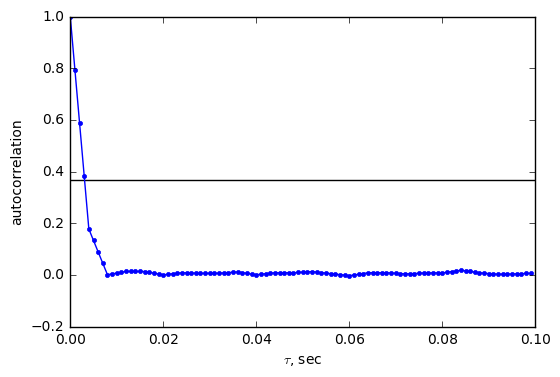

In [44]:
autocorr_plot(df.t_sensor_combined_0__f_gyro_rad_0_)
hlines(0.368, 0, 0.0999)

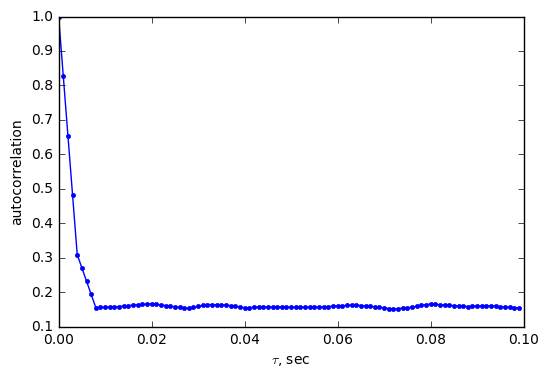

In [45]:
autocorr_plot(df.t_sensor_combined_0__f_accelerometer_m_s2_1_)

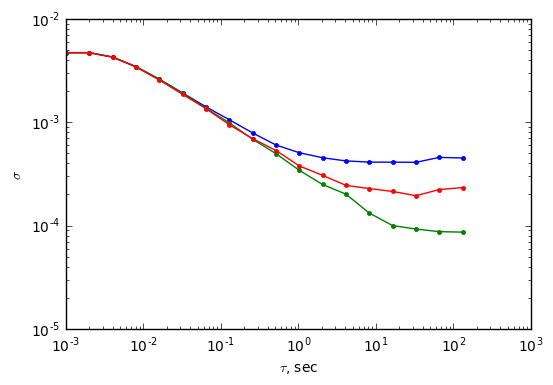

In [40]:
alan_plot(df.t_sensor_combined_0__f_gyro_rad_0_)
alan_plot(df.t_sensor_combined_0__f_gyro_rad_1_)
alan_plot(df.t_sensor_combined_0__f_gyro_rad_2_)

In [15]:

df.t_sensor_combined_0__f_accelerometer_m_s2_0_.autocorr(lag=10)

0.18917430267445451

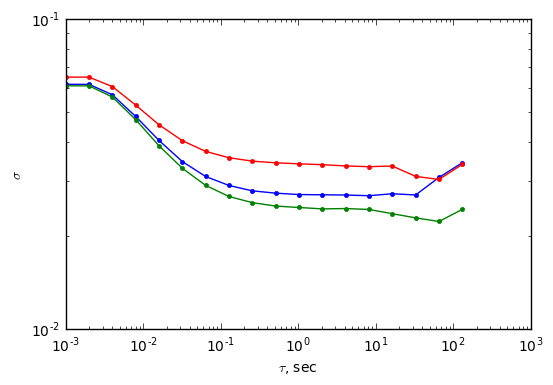

In [10]:
alan_plot(df.t_sensor_combined_0__f_accelerometer_m_s2_0_)
alan_plot(df.t_sensor_combined_0__f_accelerometer_m_s2_1_)
alan_plot(df.t_sensor_combined_0__f_accelerometer_m_s2_2_)